In [1]:
import os
import torch
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize
from torchvision.models import resnet18, resnet50
from collections import OrderedDict

In [6]:
model = resnet18(pretrained=True)
for name, module in model.named_children():
    print(name)

/home/shreyas/anaconda3/envs/ets/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shreyas/anaconda3/envs/ets/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [33]:
input = torch.randn(1, 3, 224, 224)
output = model(input)
print(output.shape)

torch.Size([1, 1000])


In [38]:
vec = torch.randn(1, 3)
vec

tensor([[ 0.9907, -0.8027,  0.0424]])

In [40]:
torch.norm(vec, p=2, dim=1)

tensor([1.2758])

In [34]:
print(output)

tensor([[-5.7289e-01, -3.4009e-01, -5.5555e-01, -1.4757e+00, -6.7417e-01,
         -8.4897e-02, -5.2072e-01,  5.0408e-01,  4.1909e-01, -8.3840e-01,
         -9.8296e-01, -8.3440e-01, -2.7882e-01, -9.1903e-01, -1.0961e+00,
         -4.9871e-01, -7.5252e-01, -1.9867e-01, -5.3358e-01, -6.0799e-01,
         -1.5491e+00, -6.0192e-01, -1.4581e+00,  2.6129e-01, -8.4741e-01,
         -1.0695e+00, -7.7640e-01, -1.2346e+00, -8.5490e-01, -3.3558e-01,
         -8.5050e-01, -7.6109e-01, -4.9087e-01, -4.9224e-01, -3.3916e-01,
         -4.6073e-01,  5.9169e-01, -6.9628e-01, -4.4368e-01,  1.4002e-01,
         -6.3667e-01, -8.0132e-01, -9.8623e-01, -3.1329e-01, -6.5796e-01,
         -4.1285e-01, -7.1485e-01, -4.9300e-01, -1.1385e+00, -1.1234e+00,
         -4.1406e-01,  5.5917e-01, -2.8389e-01, -6.5727e-01, -1.7920e-01,
         -1.1144e+00, -3.9683e-01, -1.5354e+00, -4.9514e-01, -4.4821e-01,
          7.9465e-01,  1.3278e-01, -1.3721e-01,  1.4844e-01, -6.6335e-01,
         -1.4419e-01, -2.9170e-01, -3.

In [37]:
torch.nn.functional.normalize(output, p=2, dim=1)

tensor([[-2.1939e-02, -1.3023e-02, -2.1274e-02, -5.6511e-02, -2.5817e-02,
         -3.2511e-03, -1.9941e-02,  1.9303e-02,  1.6049e-02, -3.2106e-02,
         -3.7642e-02, -3.1953e-02, -1.0677e-02, -3.5194e-02, -4.1975e-02,
         -1.9098e-02, -2.8817e-02, -7.6079e-03, -2.0433e-02, -2.3283e-02,
         -5.9323e-02, -2.3050e-02, -5.5836e-02,  1.0006e-02, -3.2451e-02,
         -4.0956e-02, -2.9732e-02, -4.7279e-02, -3.2738e-02, -1.2851e-02,
         -3.2569e-02, -2.9145e-02, -1.8798e-02, -1.8850e-02, -1.2988e-02,
         -1.7643e-02,  2.2658e-02, -2.6664e-02, -1.6990e-02,  5.3619e-03,
         -2.4381e-02, -3.0686e-02, -3.7767e-02, -1.1997e-02, -2.5196e-02,
         -1.5810e-02, -2.7375e-02, -1.8879e-02, -4.3600e-02, -4.3018e-02,
         -1.5856e-02,  2.1413e-02, -1.0871e-02, -2.5170e-02, -6.8624e-03,
         -4.2674e-02, -1.5196e-02, -5.8796e-02, -1.8961e-02, -1.7164e-02,
          3.0431e-02,  5.0846e-03, -5.2543e-03,  5.6844e-03, -2.5402e-02,
         -5.5215e-03, -1.1171e-02, -1.

In [29]:
print(model.fc)

Linear(in_features=2048, out_features=1000, bias=True)


In [26]:
dim = 512

In [16]:
f = torch.nn.Sequential(OrderedDict([*(list(model.named_children())[:-1])])) # remove the last layer
# f.add_module('flatten', torch.nn.Flatten()) # flatten the output of the last convolutional layer
# f.add_module('fc', torch.nn.Linear(2048, dim)) # add the fully connected layer for retraining

In [10]:
input = torch.randn(1, 3, 224, 224)

In [30]:
output = f(input).flatten()

In [31]:
output

tensor([0.9513, 0.8859, 0.9215, 1.0655, 0.8823, 0.9306, 0.9773, 1.1465, 0.9135,
        1.0116, 0.8766, 0.8849, 0.9125, 0.8109, 0.9623, 0.9269, 0.9602, 1.4055,
        0.9882, 0.8616, 0.8500, 1.0836, 0.9085, 0.9498, 0.9347, 0.9270, 0.9563,
        0.9469, 0.8788, 0.9143, 0.9300, 0.8481, 0.8192, 0.9135, 0.8457, 0.9028,
        1.0115, 0.9288, 0.8528, 0.8536, 0.8355, 0.8857, 0.8378, 0.9642, 0.8435,
        0.8986, 0.9036, 1.2075, 0.9614, 0.8152, 0.9165, 0.9156, 0.9211, 0.8937,
        0.9919, 0.8731, 1.0827, 0.9020, 1.0074, 1.0438, 0.9272, 0.8714, 0.9691,
        0.9080, 0.8898, 1.0530, 0.8197, 0.9084, 0.9613, 0.8896, 0.9074, 0.8255,
        0.8657, 0.8464, 0.9746, 0.9091, 0.8336, 0.8299, 0.8759, 0.8046, 0.9334,
        0.9966, 1.1078, 1.0091, 0.8476, 0.9836, 0.9605, 0.8434, 0.9679, 0.8955,
        0.7853, 0.9105, 0.8832, 0.9309, 0.8832, 0.8229, 0.9120, 0.8999, 0.9308,
        0.8510, 0.9915, 1.0467, 0.9631, 1.0293, 0.9399, 0.8103, 0.9393, 0.8326,
        0.8560, 0.9348, 0.9233, 0.9479, 

In [32]:
torch.nn.functional.normalize(output, p=2, dim=0)

tensor([0.0449, 0.0418, 0.0435, 0.0503, 0.0417, 0.0440, 0.0462, 0.0542, 0.0432,
        0.0478, 0.0414, 0.0418, 0.0431, 0.0383, 0.0455, 0.0438, 0.0454, 0.0664,
        0.0467, 0.0407, 0.0401, 0.0512, 0.0429, 0.0449, 0.0442, 0.0438, 0.0452,
        0.0447, 0.0415, 0.0432, 0.0439, 0.0401, 0.0387, 0.0431, 0.0399, 0.0426,
        0.0478, 0.0439, 0.0403, 0.0403, 0.0395, 0.0418, 0.0396, 0.0455, 0.0398,
        0.0424, 0.0427, 0.0570, 0.0454, 0.0385, 0.0433, 0.0432, 0.0435, 0.0422,
        0.0469, 0.0412, 0.0511, 0.0426, 0.0476, 0.0493, 0.0438, 0.0412, 0.0458,
        0.0429, 0.0420, 0.0497, 0.0387, 0.0429, 0.0454, 0.0420, 0.0429, 0.0390,
        0.0409, 0.0400, 0.0460, 0.0429, 0.0394, 0.0392, 0.0414, 0.0380, 0.0441,
        0.0471, 0.0523, 0.0477, 0.0400, 0.0465, 0.0454, 0.0398, 0.0457, 0.0423,
        0.0371, 0.0430, 0.0417, 0.0440, 0.0417, 0.0389, 0.0431, 0.0425, 0.0440,
        0.0402, 0.0468, 0.0494, 0.0455, 0.0486, 0.0444, 0.0383, 0.0444, 0.0393,
        0.0404, 0.0442, 0.0436, 0.0448, 

In [21]:
out = model(input).flatten()
out

tensor([-6.8086e-01, -3.9612e-01, -5.2315e-01, -1.4816e+00, -7.8046e-01,
        -1.1802e-01, -5.0648e-01,  6.1248e-01,  4.5573e-01, -7.5476e-01,
        -1.0502e+00, -8.6356e-01, -2.8034e-01, -9.5286e-01, -1.1029e+00,
        -5.3411e-01, -7.7524e-01, -2.5227e-01, -4.9899e-01, -5.2026e-01,
        -1.5380e+00, -6.0573e-01, -1.3629e+00,  1.7732e-01, -8.3549e-01,
        -1.1715e+00, -7.7520e-01, -1.1195e+00, -9.1613e-01, -3.3214e-01,
        -7.8141e-01, -8.1285e-01, -5.1966e-01, -4.7591e-01, -4.8426e-01,
        -4.0883e-01,  5.6166e-01, -7.1959e-01, -4.5376e-01,  1.8171e-01,
        -7.1192e-01, -8.7712e-01, -1.0765e+00, -3.0930e-01, -5.9963e-01,
        -4.5568e-01, -7.3724e-01, -4.2082e-01, -1.1656e+00, -1.0650e+00,
        -4.7634e-01,  4.8721e-01, -3.0890e-01, -6.0827e-01, -1.1956e-01,
        -1.0765e+00, -3.5136e-01, -1.4160e+00, -3.7000e-01, -4.7565e-01,
         7.6105e-01,  1.4718e-01, -1.2797e-01,  1.5200e-01, -6.8891e-01,
        -1.0902e-01, -2.7812e-01, -2.7434e-01, -7.9

In [12]:
torch.norm(output, p=2, dim=1, keepdim=True)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [34]:
f

Sequential(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=

In [35]:
f = torch.nn.Sequential(OrderedDict([*(list(model.named_children())[:-1])])) # remove the last layer
f.add_module('flatten', torch.nn.Flatten()) # flatten layer needed or else the input to the fully connected layer will be of shape (1, 2048, 1, 1) (Not multipliable with (2048, 512)
f.add_module('fc', torch.nn.Linear(in_features=2048, out_features=512)) # add a new layer
print(f)

Linear(in_features=2048, out_features=512, bias=True)


In [37]:
input = torch.randn(1, 3, 224, 224)
output = f(input)
print(output.shape)

torch.Size([1, 512])


In [2]:
from image_ops import load_and_resize, combine_image_and_heatmap
from similarity_ops import compute_spatial_similarity
import numpy as np
import os
import cv2

In [38]:
import torch.nn as nn

device_ids = [0]

# Load the pretrained ResNet18 model
pretrained_model = resnet50(pretrained=True)

# # Create the finetuning model with the pretrained backbone
# print("Creating the finetuning model and putting it on GPUs {}...".format(device_ids))
finetuned_model = nn.Sequential(OrderedDict([*(list(pretrained_model.named_children())[:-1])])) 
finetuned_model.add_module('flatten', nn.Flatten())  
finetuned_model.add_module('fc', nn.Linear(2048, dim))

for name, module in finetuned_model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
flatten
fc


In [40]:
stylianou_model = nn.Sequential(OrderedDict([*(list(finetuned_model.named_children())[:-3])]))
for name, module in stylianou_model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4


In [9]:
finetuned_model = nn.DataParallel(finetuned_model, device_ids=device_ids) # CHANGE TO finetuned_model in actual

for name, module in finetuned_model.named_children():
    print(name)

finetuned_model.to(f'cuda:{device_ids[0]}')

module


DataParallel(
  (module): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [34]:
# print(list(finetuned_model.module.named_children())[-1])
for name, module in finetuned_model.module.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool


In [35]:
# Create a sub-model with the backbone and the average pooling layer for Stylianou approach
stylianou_model = nn.Sequential(OrderedDict([*(list(finetuned_model.module.named_children())[:-1])]))

for name, module in stylianou_model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4


In [36]:
stylianou_model = nn.DataParallel(stylianou_model, device_ids=device_ids)

for name, module in stylianou_model.named_children():
    print(name)

stylianou_model.to(f'cuda:{device_ids[0]}')

module


DataParallel(
  (module): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

Create a class dictionary to store mappings of class names with class ids

In [10]:
img_path = "dataset/CUB_200_2011/images/"
dir_list = os.listdir(img_path)
class_dict = {}
for dirname in dir_list:
    tokens = dirname.split(".")
    class_dict[tokens[1].lower()] = tokens[0]

class_dict

{'prothonotary_warbler': '177',
 'yellow_throated_vireo': '157',
 'prairie_warbler': '176',
 'cardinal': '017',
 'sooty_albatross': '003',
 'florida_jay': '074',
 'olive_sided_flycatcher': '040',
 'swainson_warbler': '178',
 'cape_glossy_starling': '134',
 'chestnut_sided_warbler': '165',
 'yellow_bellied_flycatcher': '043',
 'northern_waterthrush': '183',
 'ruby_throated_hummingbird': '068',
 'ringed_kingfisher': '082',
 'great_grey_shrike': '112',
 'parakeet_auklet': '007',
 'red_winged_blackbird': '010',
 'geococcyx': '110',
 'pine_warbler': '175',
 'white_eyed_vireo': '156',
 'field_sparrow': '119',
 'tropical_kingbird': '077',
 'nelson_sharp_tailed_sparrow': '126',
 'western_grebe': '053',
 'bewick_wren': '193',
 'mockingbird': '091',
 'brewer_sparrow': '115',
 'ring_billed_gull': '064',
 'house_sparrow': '118',
 'cedar_waxwing': '186',
 'indigo_bunting': '014',
 'herring_gull': '062',
 'grasshopper_sparrow': '121',
 'vesper_sparrow': '131',
 'seaside_sparrow': '128',
 'heermann_g

### Create CSV to store image file paths with corresponding bboxes

In [11]:
import pandas as pd

dataset_path = "dataset/CUB_200_2011"
imgs_path = dataset_path + "/images"
imgfile_path = dataset_path + "/images.txt"
bbox_path = dataset_path + "/bounding_boxes.txt"

df = pd.DataFrame(columns=['img_id', 'img_path', 'img_name', 'gx', 'gy', 'gw', 'gh', 'correct'])

with open(imgfile_path, 'r') as f:
    for line in f:
        line = line.strip('\n')
        l = line.split(' ')
        img_id, img_path = l
        df.loc[int(img_id)] = [int(img_id), imgs_path + "/" + img_path, img_path.split('/')[1], 0, 0, 0, 0, 0]

with open(bbox_path, 'r') as f:
    for line in f:
        line = line.strip('\n')
        l = line.split(' ')
        img_id, gx, gy, gw, gh = l
        df.loc[int(img_id), ['gx', 'gy', 'gw', 'gh']] = [gx, gy, gw, gh]

file_name = "dataset/CUB_200_2011/annotations.csv"
df.to_csv(file_name, sep='\t', encoding='utf-8')

KeyboardInterrupt: 

Now, sample images from the CUB_200_2011 dataset to create an img_retrieval folder with 'query' and 'gallery' subfolders. \
For this, run the `create_dataset.py` script.

In [ ]:
# Only run this once to create the sample image retrieval dataset !!
!python3 create_dataset.py -p dataset/CUB_200_2011/images -n dataset/img_retrieval_CUB_200_2011 -q 1 -g 4

Next, compute embeddings for query and gallery images using the pretrained `resnet18` encoder.

In [6]:
# function to compute the embeddings for each image in a input path using model defined above and save them in a output path
def compute_and_save_embeddings(inp_path : str, out_path : str):
    # create output directories
    os.makedirs(out_path + "/query", exist_ok=True)
    os.makedirs(out_path + "/gallery", exist_ok=True)

    query_path = inp_path + "/query"
    gallery_path = inp_path + "/gallery"

    # compute embeddings for query images
    query_files = os.listdir(query_path)
    for file in query_files:
        img = read_image(query_path + "/" + file)
        input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        out = f(input_tensor.unsqueeze(0))
        output_tensor = out.flatten()
        torch.save(output_tensor, out_path + "/query/" + file[:-4] + ".pt")

    # compute embeddings for gallery images
    gallery_dirnames = os.listdir(gallery_path)
    for dirname in gallery_dirnames:
        os.makedirs(out_path + "/gallery" + "/" + dirname, exist_ok=True)
        gallery_files = os.listdir(gallery_path + "/" + dirname)
        
        for file in gallery_files:
            img = read_image(gallery_path + "/" + dirname + "/" + file)
            input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            out = f(input_tensor.unsqueeze(0))
            output_tensor = out.flatten() 
            torch.save(output_tensor, out_path + "/gallery/" + dirname + "/" + file[:-4] + ".pt")

In [7]:
compute_and_save_embeddings("dataset/img_retrieval_CUB_200_2011", "embeddings_CUB_200_2011")

/home/shreyas/anaconda3/envs/fcam/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Finally, retrieve the saved embeddings, find the top-1 matched image using cosine similarity and save the heatmaps.

In [15]:
def stylianou(img1_path, img2_path, save_path): 
    '''
        Separate definition for CUB dataset, with only query-heatmap overlay as output.
    '''
    img1_filename = img1_path.split("/")[-1][:-4]
    img1 = read_image(img1_path)
    img2 = read_image(img2_path)

    # Preprocess
    img1_norm = normalize(resize(img1, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    img2_norm = normalize(resize(img2, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

    f = torch.nn.Sequential(*list(model.children())[:-2])  
    features1 = f(img1_norm.unsqueeze(0))
    features2 = f(img2_norm.unsqueeze(0))

    c, h, w = features1.squeeze(0).shape

    # Compute the similarity heatmap
    conv1 = features1.squeeze(0).permute(1, 2, 0).detach().numpy().reshape(h*w, c)
    conv2 = features2.squeeze(0).permute(1, 2, 0).detach().numpy().reshape(h*w, c)
    similarity = compute_spatial_similarity(conv1, conv2)

    similarity1, _ = similarity

    # dummy_arr = np.zeros((224, 224, 3))
    img1_arr = cv2.resize(cv2.imread(img1_path), (224, 224))
    print(img1_arr.shape)

    # img1_out = combine_image_and_heatmap(dummy_arr, similarity1)  # overlay heatmap on image
    img1_out = combine_image_and_heatmap(img1_arr, similarity1)  # overlay heatmap on image

    overlay_img = img1_out[:, :, :3]
    sim_path = save_path + "/" + "{}.jpg".format(img1_filename)
    cv2.imwrite(sim_path, overlay_img)

In [16]:
import os

img1_path = os.getcwd() + "/0003_c3s3_064744_00.jpg"
img2_path = os.getcwd() + "/0003_c5s3_065187_00.jpg"
stylianou(img1_path, img2_path, os.getcwd() + "/market1501_vis")

(224, 224, 3)


/home/shreyas/anaconda3/envs/ets/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [491]:
# function to retrieve the query embeddings, compute the cosine similarity with all the gallery embeddings, return the top 1 results and save whether top-1 class matches or not
def retrieve_visualize(img_path : str, emb_path : str, vis_path: str, csv_path: str):
    # create output directories
    os.makedirs(vis_path, exist_ok=True)

    query_path = emb_path + "/query"
    gallery_path = emb_path + "/gallery"

    # retrieve and visualize query images
    df = pd.read_csv(csv_path, sep='\t', encoding='utf-8')
    
    query_files = os.listdir(query_path)
    for query_file in query_files:
        query_emb = torch.load(query_path + "/" + query_file)
        gallery_dirnames = os.listdir(gallery_path)
        max_sim = -1
        max_file_path = ""
        for dirname in gallery_dirnames:
            file_names = os.listdir(gallery_path + "/" + dirname)
            for file in file_names:
                gallery_emb = torch.load(gallery_path + "/" + dirname + "/" + file)
                sim = torch.cosine_similarity(query_emb, gallery_emb, dim=0)
                if sim > max_sim:
                    max_sim = sim
                    max_file_path = dirname + "/" + file

        print("Query : {} | Top reference : {}".format(query_file, max_file_path))

        correct = 0

        # save whether the retrieved image is of the correct class or not
        try:
            query_class = '_'.join(query_file[:-3].split('_')[:-2])
            query_class_id = int(class_dict[query_class.lower()])
            max_class = max_file_path.split('/')[0].split('.')[1]
            max_class_id = int(class_dict[max_class.lower()])

            
            if query_class_id == max_class_id:
                correct = 1

        except:
            pass

        query_imgname = query_file[:-3] + ".jpg"
        df.loc[df['img_name'] == query_imgname, 'correct'] = correct
        stylianou(img_path + "/query/" + query_file[:-3] + ".jpg", img_path + "/gallery/" + max_file_path[:-3] + ".jpg", vis_path)
    
    df.to_csv(csv_path, sep='\t', encoding='utf-8')

In [492]:
img_path = "dataset/img_retrieval_CUB_200_2011"
emb_path = "embeddings_CUB_200_2011"
vis_path = "visualizations_CUB_200_2011/heatmaps"
csv_path = "dataset/CUB_200_2011/annotations.csv"
retrieve_visualize(img_path, emb_path, vis_path, csv_path)

Query : Western_Meadowlark_0120_77834.pt | Top reference : 038.Great_Crested_Flycatcher/Great_Crested_Flycatcher_0004_29701.pt


/home/shreyas/anaconda3/envs/ets/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Query : House_Wren_0130_187109.pt | Top reference : 196.House_Wren/House_Wren_0071_187399.pt
Query : Red_Breasted_Merganser_0064_79563.pt | Top reference : 090.Red_breasted_Merganser/Red_Breasted_Merganser_0074_79497.pt
Query : Red_Headed_Woodpecker_0031_183096.pt | Top reference : 191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0081_182811.pt
Query : Lincoln_Sparrow_0036_117280.pt | Top reference : 037.Acadian_Flycatcher/Acadian_Flycatcher_0049_795580.pt
Query : Red_Winged_Blackbird_0046_4242.pt | Top reference : 010.Red_winged_Blackbird/Red_Winged_Blackbird_0093_5948.pt
Query : Pileated_Woodpecker_0015_180072.pt | Top reference : 188.Pileated_Woodpecker/Pileated_Woodpecker_0072_180006.pt
Query : Kentucky_Warbler_0040_795868.pt | Top reference : 167.Hooded_Warbler/Hooded_Warbler_0124_164923.pt
Query : Worm_Eating_Warbler_0055_795555.pt | Top reference : 162.Canada_Warbler/Canada_Warbler_0022_157106.pt
Query : Prairie_Warbler_0138_172695.pt | Top reference : 168.Kentucky_Warbler/Kentuc

Next, compute bboxes from heatmaps using thresholding.

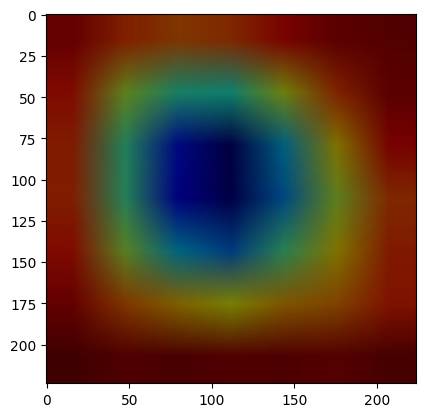

In [366]:
from matplotlib import pyplot as plt
%matplotlib inline

hmap_path = 'visualizations_CUB_200_2011/heatmaps'
hmap_name = 'White_Pelican_0048_95764.jpg'
hmap = cv2.imread(hmap_path + "/" + hmap_name)
plt.imshow(hmap, cmap='gray')
plt.show()

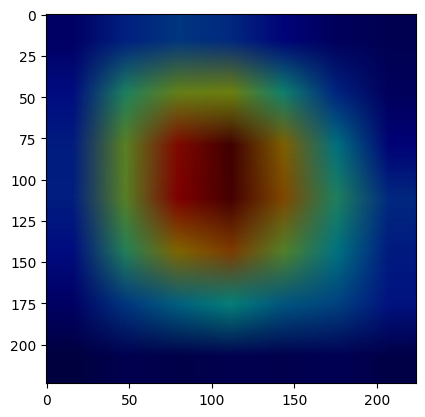

In [367]:
hmap_cvt = cv2.cvtColor(hmap, cv2.COLOR_RGB2BGR)
plt.imshow(hmap_cvt, cmap='gray')
plt.show()

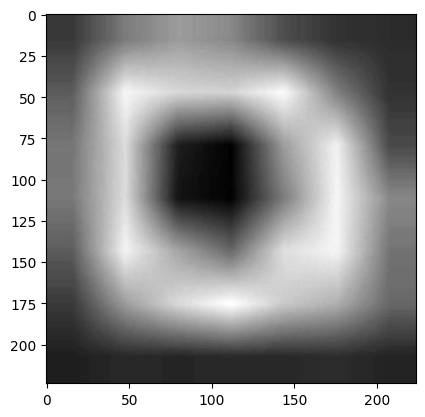

In [368]:
hmap_gray = cv2.cvtColor(hmap_cvt, cv2.COLOR_BGR2GRAY)
plt.imshow(hmap_gray, cmap='gray')
plt.show()

In [374]:
tau = 0.3
print(np.max(hmap_gray))
print(np.min(hmap_gray))

109
7


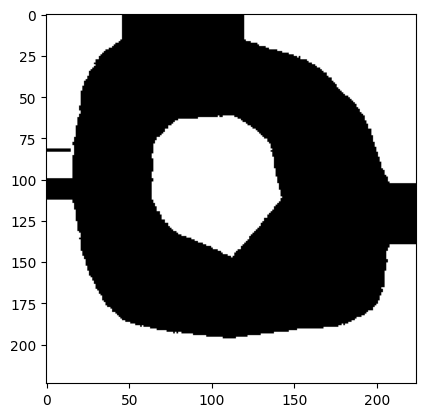

In [495]:
hmap_thres = cv2.threshold(hmap_gray, tau * np.max(hmap_gray), 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(hmap_thres, cmap='gray')
plt.show()

In [429]:
def compute_bboxes_from_heatmaps(hmap_path : str, img_path: str, vis_path: str, tau, area_frac):
    '''
        Function to compute bounding boxes from heatmaps, overlay them on images and store the bboxes and heatmaps.
    '''
    hmaps = os.listdir(hmap_path)
    for hmap_name in hmaps:
        bboxes = list()
        img_name = hmap_name
        # print(img_name)
        hmap = cv2.imread(hmap_path + "/" + hmap_name)
        hmap_cvt = cv2.cvtColor(hmap, cv2.COLOR_RGB2BGR)
        hmap_gray = cv2.cvtColor(hmap_cvt, cv2.COLOR_BGR2GRAY)

        hmap_thres = cv2.threshold(hmap_gray, tau * np.max(hmap_gray), 255, cv2.THRESH_BINARY_INV)[1]
        area_thres = area_frac * hmap_thres.shape[0] * hmap_thres.shape[1]

        cnts = cv2.findContours(hmap_thres.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        # (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
        img_arr = load_and_resize(img_path + "/{}".format(hmap_name))
        
        for c in cnts:
            if cv2.contourArea(c) < area_thres: continue
            x,y,w,h = cv2.boundingRect(c)
            bboxes.append([x, y, w, h])
            img_arr = cv2.rectangle(img_arr, (x, y), (x + w, y + h), (10, 255, 34), 2)
            
        cv2.imwrite(vis_path + "/overlayed/{}".format(hmap_name), img_arr)
        bboxes = np.array(bboxes)

        os.makedirs(vis_path + '/boxes', exist_ok=True)
        bbox_filename = hmap_name[:-4] + ".npy"
        np.save(vis_path + "/boxes/{}".format(bbox_filename), bboxes)

In [377]:
hmap_path = "visualizations_CUB_200_2011/heatmaps"
img_path = "dataset/img_retrieval_CUB_200_2011/query"
vis_path = "visualizations_CUB_200_2011/bboxes"
compute_bboxes_from_heatmaps(hmap_path, img_path, vis_path, tau=0.5, area_frac=0.1)

Florida_Jay_0035_64463.jpg
Scarlet_Tanager_0075_137602.jpg
Lazuli_Bunting_0010_14915.jpg
Horned_Grebe_0008_34515.jpg
Tree_Sparrow_0058_123591.jpg
Blue_Jay_0076_61817.jpg
Rock_Wren_0080_189340.jpg
Song_Sparrow_0132_121153.jpg
Prothonotary_Warbler_0047_174340.jpg
Mockingbird_0047_80819.jpg
Red_Legged_Kittiwake_0065_795456.jpg
Magnolia_Warbler_0064_165471.jpg
Bronzed_Cowbird_0009_24033.jpg
Common_Tern_0019_149769.jpg
Yellow_Warbler_0021_176421.jpg
Groove_Billed_Ani_0009_1522.jpg
Blue_Winged_Warbler_0060_161888.jpg
Yellow_Headed_Blackbird_0038_8689.jpg
Mangrove_Cuckoo_0024_794630.jpg
Great_Grey_Shrike_0023_106670.jpg
Shiny_Cowbird_0076_24363.jpg
White_Throated_Sparrow_0043_128818.jpg
Brandt_Cormorant_0064_22849.jpg
Northern_Flicker_0069_28924.jpg
Spotted_Catbird_0041_796807.jpg
Harris_Sparrow_0088_116445.jpg
Yellow_Bellied_Flycatcher_0017_795490.jpg
Pigeon_Guillemot_0084_40217.jpg
Cactus_Wren_0116_185927.jpg
Golden_Winged_Warbler_0009_794813.jpg
Parakeet_Auklet_0007_795932.jpg
Orchard_Orio

In [430]:
def compute_iou(bbox1, bbox2):
    '''
        Function to compute IoU between two bounding boxes.
    '''
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2

    xA = max(x1, x2)
    yA = max(y1, y2)
    xB = min(x1 + w1, x2 + w2)
    yB = min(y1 + h1, y2 + h2)

    interArea = max(0, xB - xA) * max(0, yB - yA)

    boxAArea = w1 * h1
    boxBArea = w2 * h2

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [431]:
def resize_bboxes(bbox, w, h):
    '''
        Function to resize bounding boxes to original image size.
    '''
    x, y, bw, bh = bbox
    x = int(x / w * 224)
    y = int(y / h * 224)
    bw = int(bw / w * 224)
    bh = int(bh / h * 224)
    return [x, y, bw, bh]

In [504]:
def compute_box_acc(hmap_path : str, img_path: str, vis_path: str, csv_path : str, bbox_path : str, tau = 0.5, delta = 0.5, area_frac = 0.1, is_loc = False) -> float:
    '''
        Function to compute mean IoU between ground truth and predicted bounding boxes.
    '''

    # First, compute the bounding boxes from heatmaps
    compute_bboxes_from_heatmaps(hmap_path, img_path, vis_path, tau, area_frac)

    df = pd.read_csv(csv_path, sep='\t')
    bbox_names = os.listdir(bbox_path)
    mean_iou = 0
    for bbox_name in bbox_names:
        img_name = bbox_name[:-4] + ".jpg"
        gt_bbox_ = df[df['img_name'] == img_name][['gx', 'gy', 'gw', 'gh']].values[0]
        img = read_image(img_path + "/" + img_name)
        _, h, w = img.shape
        gt_bbox = resize_bboxes(gt_bbox_, w, h)
        pred_bboxes = np.load(bbox_path + "/" + bbox_name)

        max_iou = 0
        # max_pred_bbox = None
        for pred_bbox in pred_bboxes:
            if compute_iou(gt_bbox, pred_bbox) > max_iou: 
                max_iou = compute_iou(gt_bbox, pred_bbox)
                # max_pred_bbox = pred_bbox

        # if img_name == "Common_Raven_0128_102017.jpg":
        #     print(img_name)
        #     print(w, h)
        #     print(gt_bbox_, gt_bbox)
        #     print(max_pred_bbox)
        #     print(max_iou)

        correct = df.loc[df['img_name'] == img_name]['correct'].values[0]
        if is_loc:
            max_iou = 1 if max_iou > delta and correct == 1 else 0
        else:
            max_iou = 1 if max_iou > delta else 0
        mean_iou += max_iou
    return mean_iou / len(bbox_names)

In [508]:
hmap_path = "visualizations_CUB_200_2011/heatmaps"
img_path = "dataset/img_retrieval_CUB_200_2011/query"
vis_path = "visualizations_CUB_200_2011/bboxes"
csv_path = "dataset/CUB_200_2011/annotations.csv"   
bbox_path = vis_path + "/boxes"

tau = 0.6
delta = 0.5
area_frac = 0.1
is_loc = False
compute_box_acc(hmap_path, img_path, vis_path, csv_path, bbox_path, tau, delta, area_frac, is_loc)

0.54

In [514]:
def compute_max_box_acc(hmap_path : str, img_path: str, vis_path: str, csv_path : str, bbox_path : str, delta = 0.5, area_frac = 0.1, is_loc = False, step = 0.05) -> float:
    max_tau, max_box_acc = 0, 0
    metric = "Top-1 Localization" if is_loc else "MaxBoxAcc"
    print("Computing {} for delta = {} ...".format(metric, delta))

    for tau in np.arange(0, 1, step):
        box_acc = compute_box_acc(hmap_path, img_path, vis_path, csv_path, bbox_path, tau, delta, area_frac, is_loc)
        print("tau = {}, BoxAcc = {}".format(tau, box_acc))
        if box_acc > max_box_acc:
            max_box_acc = box_acc
            max_tau = tau
    print("\n{} = {} at tau = {}".format(metric, max_box_acc, max_tau))    
    print("Re-computing results for tau = {} ... ".format(max_tau))
    compute_box_acc(hmap_path, img_path, vis_path, csv_path, bbox_path, max_tau, delta, area_frac)
    print("Done.")

In [515]:
delta = 0.5
area_frac = 0.1
is_loc = True
step = 0.05
compute_max_box_acc(hmap_path, img_path, vis_path, csv_path, bbox_path, delta, area_frac, is_loc, step)

Computing Top-1 Localization for delta = 0.5 ...
tau = 0.0, BoxAcc = 0.0
tau = 0.05, BoxAcc = 0.0
tau = 0.1, BoxAcc = 0.0
tau = 0.15000000000000002, BoxAcc = 0.0
tau = 0.2, BoxAcc = 0.0
tau = 0.25, BoxAcc = 0.0
tau = 0.30000000000000004, BoxAcc = 0.005
tau = 0.35000000000000003, BoxAcc = 0.025
tau = 0.4, BoxAcc = 0.06
tau = 0.45, BoxAcc = 0.095
tau = 0.5, BoxAcc = 0.115
tau = 0.55, BoxAcc = 0.135
tau = 0.6000000000000001, BoxAcc = 0.2
tau = 0.65, BoxAcc = 0.19
tau = 0.7000000000000001, BoxAcc = 0.2
tau = 0.75, BoxAcc = 0.17
tau = 0.8, BoxAcc = 0.115
tau = 0.8500000000000001, BoxAcc = 0.1
tau = 0.9, BoxAcc = 0.085
tau = 0.9500000000000001, BoxAcc = 0.085

Top-1 Localization = 0.2 at tau = 0.6000000000000001
Re-computing results for tau = 0.6000000000000001 ... 
Done.
